#Logistic regreression model

In [1]:
import pandas as pd
import matplotlib as mat
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,classification_report, ConfusionMatrixDisplay


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Input/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We do not need to encode this data as there are no columns filled with text data, everything is numerical.


We are trying to predict diabetes with the help of this data and the result is already in the data set 'Outcome'. We will use this to train our model and to compare our model's result with the original outcome.

In [3]:
# Droping outcome from the table and storing it in another one
x = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [4]:
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=50)

In [5]:
# Scaling the data
sc = StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

^-penalty is regularization, use L1 or L2 based on the type of solver is being used.
^-Dual is used if you wish to solve the problem in dual space (use it when number of features > samples).
^-tol is tolerence for stopping criteria ( if it is low, precision will be higher, but the model will become slow).
^-c is inverse of regularization, higher c will lead to overfitting but will provide more flexibility, and lower c will introduce underfitting and create a simpler model.
^-fit intercept is center the data if it is not centered
^-Class weight is to handle imbalanced classes
^-solver is to select what type of solver do you wish to use for the model

few features - L1/L2 - 'liblinear'

(large)many features - L2 - 'lbfgs' or 'sag'

Very large - L1/L2/ElasticNet - 'saga'

^-max_iter is the number of iteration so that the model would converge


In [6]:
# let's create the model now.
model = LogisticRegression(random_state=50)
model.fit(xtrain_sc, ytrain)
ypred = model.predict(xtest_sc)

In [7]:
print("The training score is", model.score(xtrain_sc, ytrain)*100, "%")
print("The testing accuracy is", accuracy_score(ytest, ypred)*100,"%")

The training score is 79.70204841713222 %
The testing accuracy is 74.45887445887446 %


              precision    recall  f1-score   support

           0       0.75      0.89      0.82       148
           1       0.71      0.48      0.58        83

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



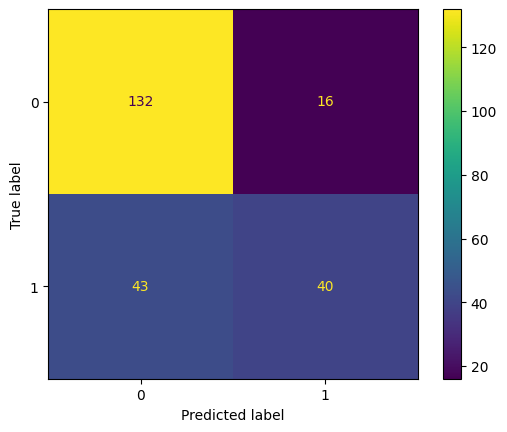

In [8]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(ytest, ypred)
print(classification_report(ytest, ypred))

This isn't a perfect model, there are a lot of things that we need to address to make the model perform perfectly.

#Adaboost

There are 2 type of adaboost, adaboost classifier or adaboost regressor. For regression models, we use adaboost regressor, and for the rest, we use adaboost classifier.

The name "Logistic Regression" has the word "regression" in it, still it is actually not a regression type model, it is a classification model so we will be using adaboost classifier here.


In [9]:
# All the necessary libraries has already been included in this file except the adaboost classifier.
from sklearn.ensemble import AdaBoostClassifier

class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, random_state=None)


Training score is 75.978 %

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       148
           1       0.63      0.63      0.63        83

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



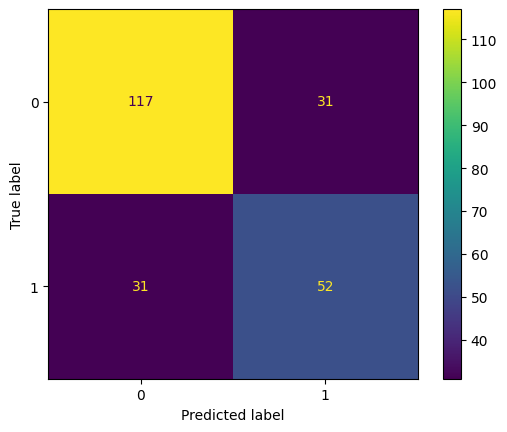

In [10]:
adb = AdaBoostClassifier(estimator=model, n_estimators= 100, random_state=50) # the model used here was decleared earlier

adb.fit(xtrain_sc, ytrain)
ypred_adb = adb.predict(xtest_sc)

print("Training score is", round(adb.score(xtrain_sc, ytrain)*100, 3), "%\n") # this is the training score

confusion_matrix = ConfusionMatrixDisplay.from_predictions(ytest, ypred_adb)
print(classification_report(ytest, ypred_adb))

Based on this confusion matrix, we can see that the model is performing even worst then it did earlier and there could be many reasons.

1) Insufficient data

2) Poor feature selection

3) the data may have noise and outliers

In order to increase the performance, we have to take care of the aforementioned things.